In [137]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
DATA_DIR = 'data'
MODEL = os.path.join('models', 'rottenfresh2.h5')

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) # Set memory limit for gpu to prevent out of memory


In [ ]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(val_size)

## Train = 70%, Validation = 20%, Test = 10%

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
model = Sequential() ## Sequential model to process images

In [ ]:
# Hyperparameters
LAYER_NUMBER = 32
SECOND_LAYER = 64
THIRD_LAYER = 128
FILTER_SIZE = (3, 3)
STRIDES = 1 # How the filter goes along the picture e.g 1 pixel at a time
PICTURE_SHAPE = (256, 256, 3)
OPTIMIZER = "adam"
ACTIVATION = "relu" ## Any negative value = 0, positive value stays the same - Rectified linear unit
DROPOUT_RATE = 0.5

# Model architecture
model = Sequential()

model.add(Conv2D(LAYER_NUMBER, FILTER_SIZE, STRIDES, activation=ACTIVATION, input_shape=PICTURE_SHAPE, padding='same')) # First Filter
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))
 
model.add(Conv2D(SECOND_LAYER, FILTER_SIZE, STRIDES, activation=ACTIVATION, padding='same')) # Second filter
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(THIRD_LAYER, FILTER_SIZE, STRIDES, activation=ACTIVATION, padding='same')) # Third filter
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten()) ## Condense values into a single output value

model.add(Dense(512, activation=ACTIVATION)) ## Makes fully-connected layers
model.add(BatchNormalization())
model.add(Dropout(DROPOUT_RATE))  ## Prevent overfitting

model.add(Dense(1, activation="sigmoid")) ## Transforms values output to between 0 and 1 for classification

# Compile the model
model.compile(optimizer=OPTIMIZER, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Model summary
model.summary()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) ## This will stop the training process when validation loss does not improve for 5 consecutive epochs

history = model.fit(train, validation_data=validation, epochs=50, batch_size=32, callbacks=[early_stopping])

In [9]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models', 'rottenfresh2.h5'))

ValueError: Weights for model sequential have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [5]:
def test_image(img_path, model):
    """Function that prints whether fruit is rotten or fresh"""
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    resize = tf.image.resize(img, (256, 256))
    prediction = model.predict(np.expand_dims(resize/255, 0))
    if (prediction < 0.5):
        print("fresh orange")
    else:
        print("rotten orange")

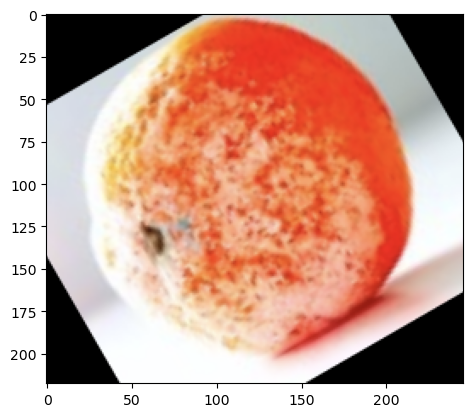

1/1 [==============================] - 0s 162ms/step
rotten orange


In [25]:
model = load_model(MODEL)
test_image("test1.png", model)